<a href="https://colab.research.google.com/github/Avinash-Reddy-Kovvuri/SKY-SAVER-BUDGET-JET-INDIAN-FARE-ANALYSIS/blob/main/Kolkata_to_Banglore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime

<ipython-input-27-e61d86bb4161>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
def parser(x):
  return pd.to_datetime(x)

In [ ]:
airindia = pd.read_excel("/content/A - Air india.xlsx")

In [ ]:
Jetairways = pd.read_excel("/content/A - Jet Airways.xlsx")

In [ ]:
airindia.head()

,Date,Airline,From,To,Fare
0,2019-01-01,Air India,Kolkata,Banglore,6535
1,2019-01-02,Air India,Kolkata,Banglore,13885
2,2019-01-03,Air India,Kolkata,Banglore,4435
3,2019-01-04,Air India,Kolkata,Banglore,4960
4,2019-01-05,Air India,Kolkata,Banglore,4960


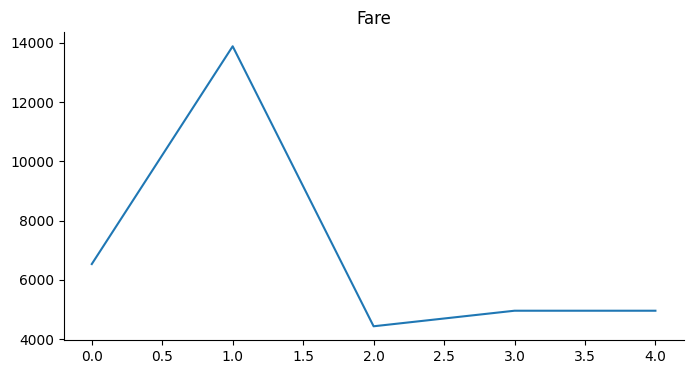

In [ ]:
from matplotlib import pyplot as plt
_df_5['Fare'].plot(kind='line', figsize=(8, 4), title='Fare')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
Jetairways.head()

,Date,Airlines,From,To,Fare
0,2019-01-01,Jet Airways,Kolkata,Banglore,14231
1,2019-01-02,Jet Airways,Kolkata,Banglore,14231
2,2019-01-03,Jet Airways,Kolkata,Banglore,10031
3,2019-01-04,Jet Airways,Kolkata,Banglore,13759
4,2019-01-05,Jet Airways,Kolkata,Banglore,11134


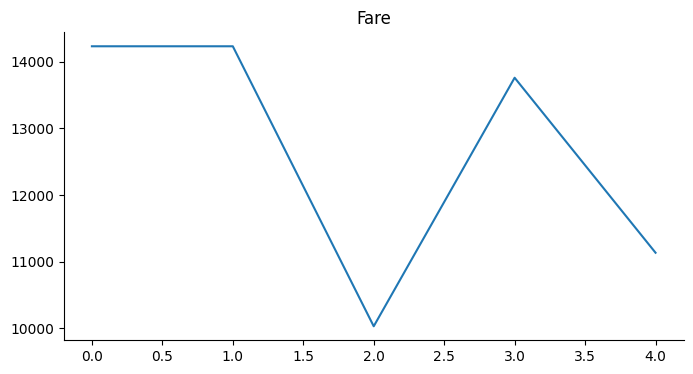

In [ ]:
from matplotlib import pyplot as plt
_df_11['Fare'].plot(kind='line', figsize=(8, 4), title='Fare')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
pip install pmdarima


In [ ]:
from pmdarima import auto_arima

In [ ]:
stepwise_fit = auto_arima(airindia['Fare'], start_p = 1, start_q = 1,
                          max_p = 10, max_q = 10, m = 12,
                          start_P = 0, seasonal = True,
                          d = 1, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=11.50 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=21665.763, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=21201.525, Time=2.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=11.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=21395.092, Time=0.41 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=21094.483, Time=5.16 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=16.60 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=6.97 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=21275.751, Time=1.56 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=20930.664, Time=13.19 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=21089.920, Time=1.57 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=22.23 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=9.57 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=20933.310, Time=3.50 sec
 ARIMA(2,1,1)(2,1,0)[12]            

In [ ]:

train = airindia.iloc[:len(airindia)-30]
test = airindia.iloc[len(airindia)-30:]


from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Fare'],
                order = (0,1,1),
                seasonal_order =(2, 1, 0, 12))

result = model.fit()

model1 = result


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

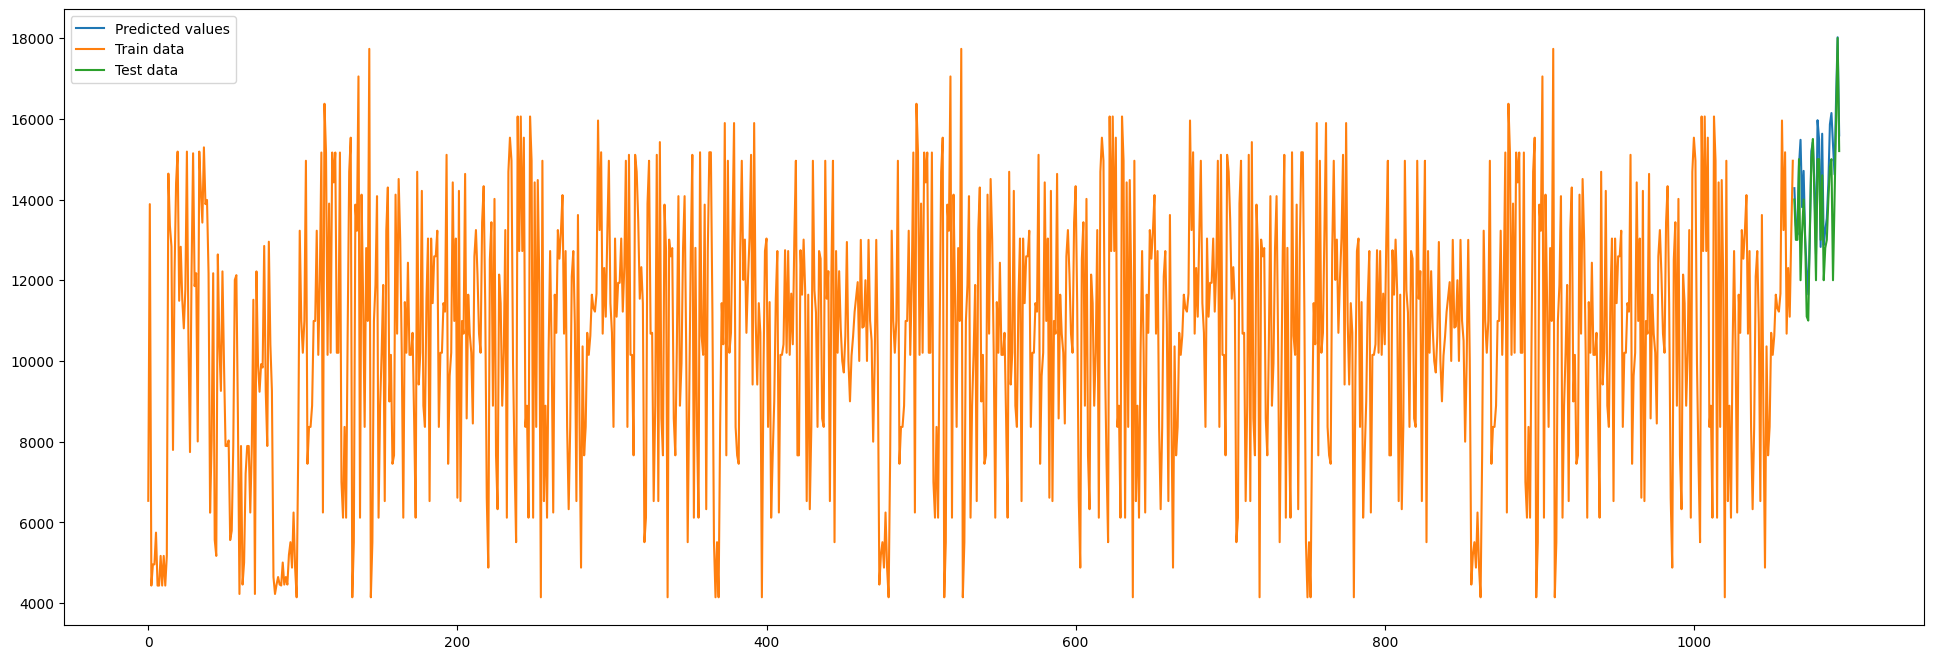

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'linear')


# plot predictions and actual values
predictions.plot(figsize = (24, 8), legend = True, label = "Predicted values")
train['Fare'].plot(legend = True, label = "Train data")
test['Fare'].plot(legend = True, label = "Test data")

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test['Fare'],predictions)
print(r2)

0.513457484310768


In [ ]:
stepwise_fit = auto_arima(Jetairways['Fare'], start_p = 1, start_q = 1,
                          max_p = 10, max_q = 10, m = 12,
                          start_P = 0, seasonal = True,
                          d = 1, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=9.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=21186.314, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=20702.003, Time=1.43 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.80 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=20920.916, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=20592.011, Time=2.26 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=14.12 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.66 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=20794.021, Time=3.05 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=20400.529, Time=11.63 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=20570.208, Time=2.39 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=27.06 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=8.90 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=20310.423, Time=14.23 sec
 ARIMA(3,1,0)(1,1,0)[12]             

In [ ]:

train = Jetairways.iloc[:len(Jetairways)-30]
test = Jetairways.iloc[len(Jetairways)-30:]


from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Fare'],
                order = (3,1,0),
                seasonal_order =(2, 1, 0, 12))

result = model.fit()

model2 = result


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

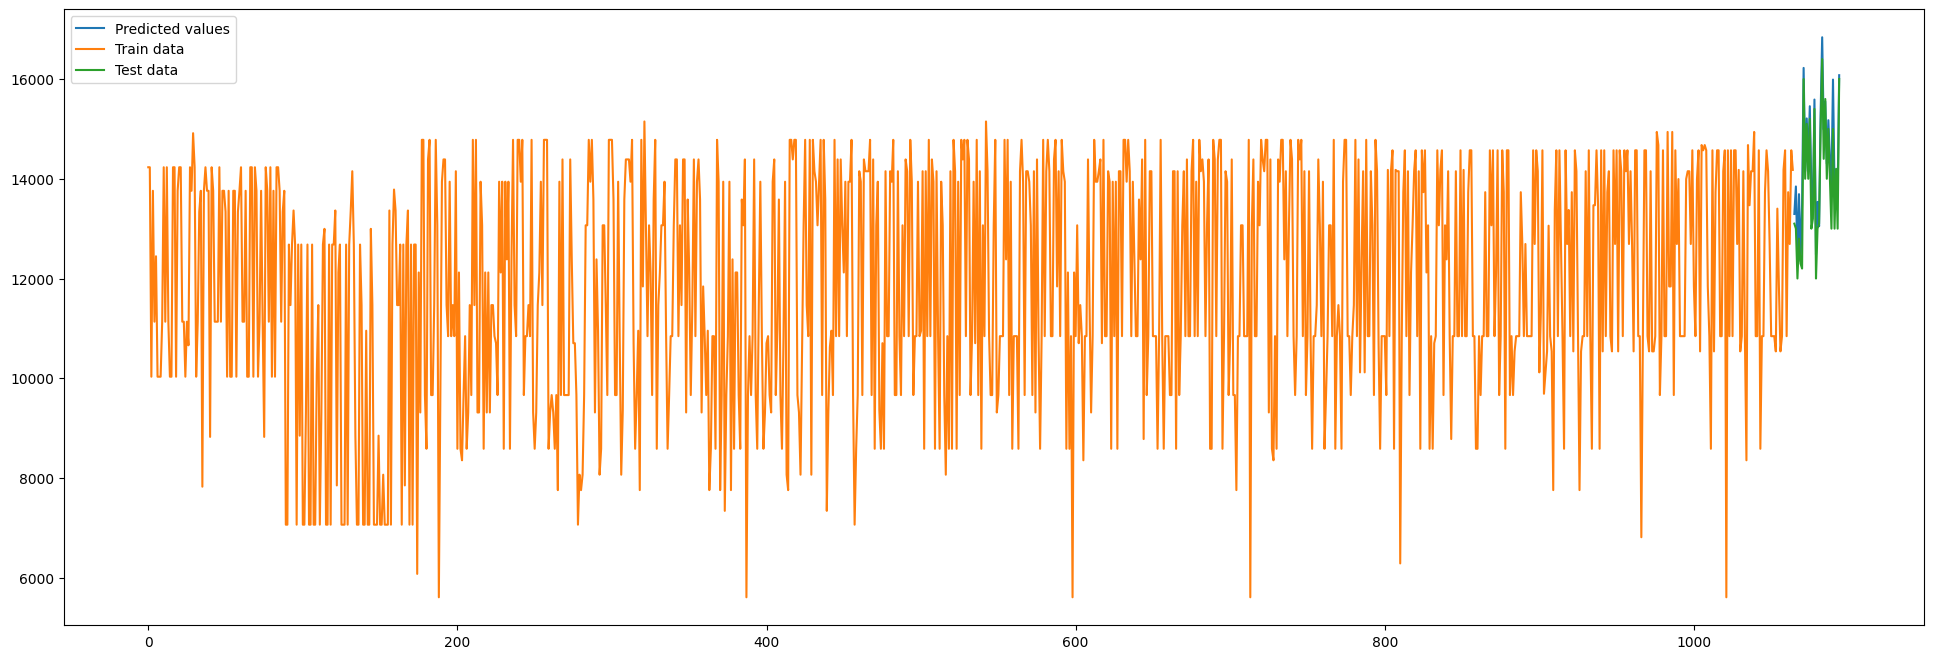

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'linear')


# plot predictions and actual values
predictions.plot(figsize = (24, 8), legend = True, label = "Predicted values")
train['Fare'].plot(legend = True, label = "Train data")
test['Fare'].plot(legend = True, label = "Test data")

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test['Fare'],predictions)
print(r2)

0.816097264277178


In [ ]:
from joblib import Parallel, delayed
import joblib


joblib.dump(model1, 'AIRINDIA_Kol-Ban.pkl')
joblib.dump(model2, 'JETAIR_Kol-Ban.pkl')


['JETAIR_Kol-Ban.pkl']